# NFL Birthday Analysis (Independent T-test)
I am currently in the SMU Masters Data Science Program and we discussing a topic on observational vs experimental studies, and one of the studies we were analyzing was the study performed on the __relative age effect in athletics__. [Brewer, L. M., and Cochran, J. J.(June 2013), "August’s Child Is...Favoured by Fortune."](https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1740-9713.2013.00661.x) Per Lauren M. Bre and James J. Cochran study:

![](https://cdn-s3.si.com/s3fs-public/styles/marquee_large_2x/public/2015/01/13/terrell-owens-popcorn-celebration.jpg?itok=GAAYT_9R)

We will be working to determine if there is a significant difference between two groups. The two groups we will be looking at are NFL players birthdays January - April and those birthday May-December to see if there are differences in the two populations. 


### Independent T-test Assumptions

As apart of any probability distribution test, there are a set of assumptions that we must assess and meet for the test results to be valid. These assumptions are as follows:
1. The smaples are independent and randomly drawn
2. The distribution of the residuals between the two groups should follow the normal distribution 
3. The variance between the two groups are equal. 

On the event that the above three distributions are violated, we will have to consider another test such as a non-parametric test or a permutation test. 

### Data Used
The data used was came from https://www.pro-football-reference.com/ and in a scripted i used to pull the NFL players birthdays. This data set contains the NFL players names, position, year of birth, years they were in the NFL, birth month and other career statistitics. We will only use the the birth month for each player and birth year we will define a starting point where the relative age effect in athletics could have occured given the american education system. 

Below we import the required libraries and take a peak at the data

In [5]:
import pandas as pd
import numpy as np
from scipy import stats

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style

In [6]:
bday = pd.read_csv('nfl_birthdays.csv', index_col=0)
bday = bday.reset_index(drop=False)
bday = bday[(bday.born >= 1980)] # who played at least 7 games
#bday = bday[['born', 'month']]
bday.head()

,index,rank_row,player,position,born,first_year,last_year,ap1,pb,st,...,sk_yds,run_att,run_yds,run_td,run_long,rec_rec,rec_yds,rec_td,rec_lng,month
4,4,5,Marvin Austin,DL,1989,2012,2014,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,5,6,Johnny Baldwin,LB,1984,2007,2007,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,6,7,Ramses Barden,WR,1986,2009,2012,0,0,0,...,NaN,NaN,NaN,NaN,NaN,29.0,394.0,0.0,31.0,1
7,7,8,Joe Barksdale,OL,1988,2011,2018,0,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19,19,20,Zach Clayton,DT,1988,2011,2012,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


## Descriptive Statistics

Distribtuion of birthday months by 5 yearh incements for those born after 1980.

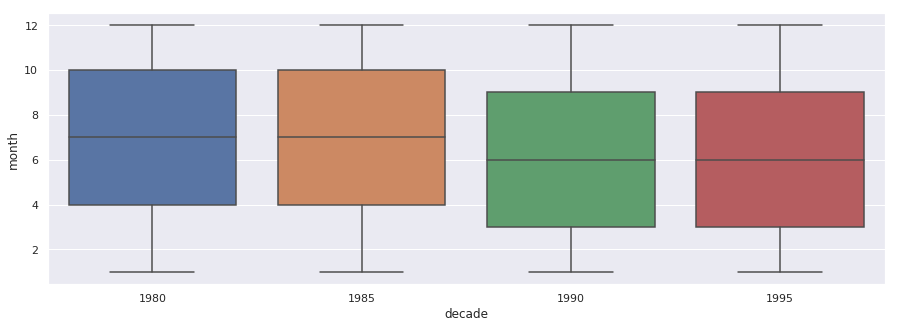

In [8]:
# compute the nearest 10 for player's decade birth
bday['decade'] = (bday['born'] // 5) * 5

# create box chart and plot players birth month disctribution arcross decades
plt.figure(figsize=(15,5))
sns.boxplot(x="decade", y="month", data=bday)   

plt.show()
plt.clf()
plt.close()

Next is a plot of QB's that have played more than 25 games born after then 1980s:


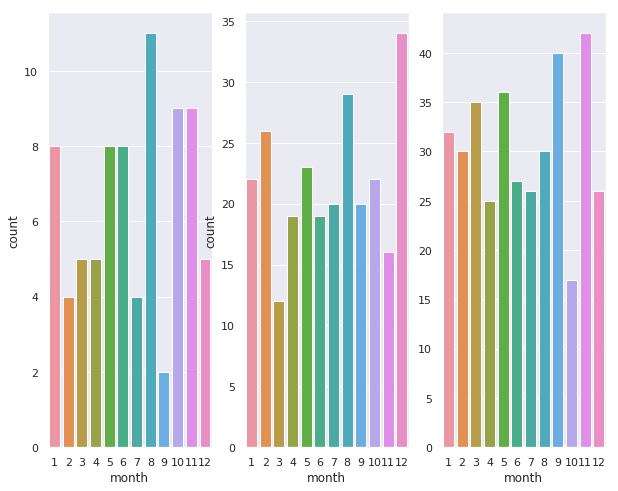

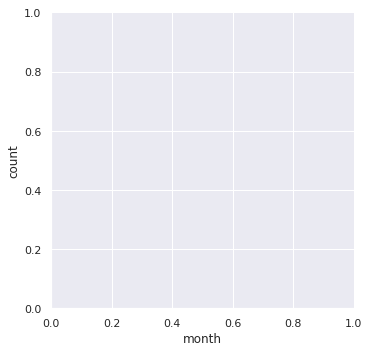

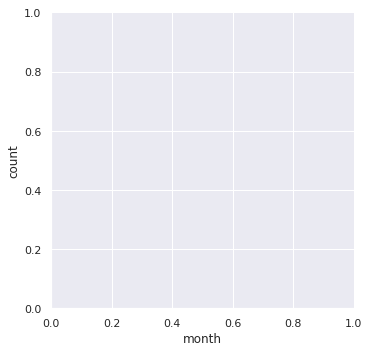

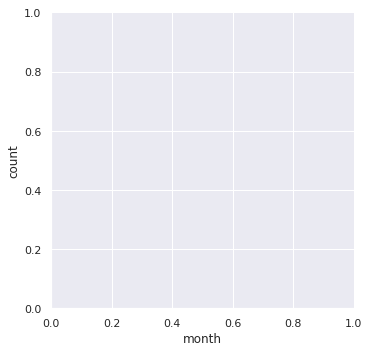

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,8))
sns.catplot(x="month", kind="count", 
            data=bday[(bday.games > 25) & (bday.position == 'QB')], ax=ax1)

ax2.set_ylabel("")  # remove y label, but keep ticks

sns.catplot(x="month", kind="count", 
            data=bday[(bday.games > 25) & (bday.position == 'RB')], ax=ax2)
sns.catplot(x="month", kind="count", 
            data=bday[(bday.games > 25) & (bday.position == 'WR')], ax=ax3)
ax3.set_ylabel("")  # remove y label, but keep ticks
plt.show()

looks for the QBs born after 1980 that played more than 100 games often are born in early winter or late spring. 

In [35]:
stats.chisquare(bday[(bday.games > 100) & (bday.position == 'QB')]['month'])

Power_divergenceResult(statistic=284.656912209889, pvalue=1.9174679309994352e-11)

In [46]:
month_ = bday.groupby(by = "month", as_index=False)['player'].count()
month_

,month,player
0,1,576
1,2,525
2,3,512
3,4,503
4,5,547
5,6,484
6,7,564
7,8,536
8,9,569
9,10,506


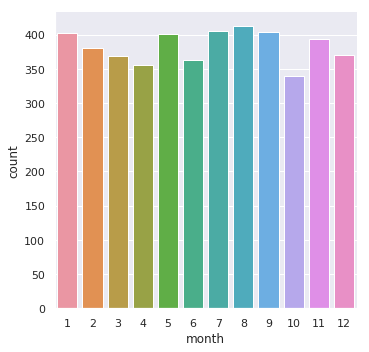

In [49]:
sns.catplot(x="month", kind="count", data=bday[bday.games > 7], ax=axs[0]));

create column indicating q1 birthday or other_birthday

In [23]:
bday.loc[bday.month <=4, "month_indicator"] = 'q1'
bday.loc[bday.month > 4, "month_indicator"] = 'other'

q1 = bday[bday.month_indicator == 'q1']
other = bday[bday.month_indicator == 'other']

evaluate some initial descriptive statistics

In [19]:
bday.groupby("month_indicator")['month'].describe()

,count,mean,std,min,25%,50%,75%,max
month_indicator,,,,,,,,
other,3089.0,8.457753,2.280574,5.0,7.0,8.0,10.0,12.0
q1,1507.0,2.448573,1.119893,1.0,1.0,2.0,3.0,4.0


There appears to be a difference between the average obviously since these are based on the month value

### Assumption Check

Lets evaluate to see if the t-test results can be trusted

#### homogenity Variance

In [24]:
stats.levene(q1['month'], other['month'])

LeveneResult(statistic=826.548632110684, pvalue=2.716792989069281e-167)

Check Normality Assumptions

In [3]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

Hypothesis
* Ho: mu(Q1 bdays) - mu(Q2-Q4 bday) = 0
* Ha: mu(Q1 bdays) - mu(Q2-Q4 bday) != 0

In [4]:
q1_bday = bday[(bday.month <= 4) & (bday.born >= 1980)].month
rest_bday = bday[(bday.month > 4) & (bday.born >= 1980)].month

In [5]:
x = np.random.choice(bday.month, size=1000 , replace=False)
y = np.random.choice(bday.month, size=1000 , replace=False)

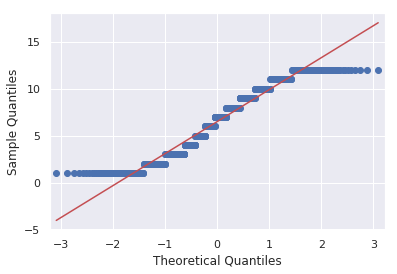

In [6]:
# q-q plot
qqplot(x, line='s')
pyplot.show()

(array([158., 107.,  71.,  72.,  73.,  87.,  99.,  98.,  81., 154.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

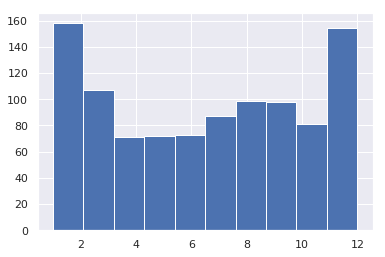

In [7]:
plt.hist(x)

it appears that we have a bimodal distribtution. 

In [8]:
from scipy.stats import shapiro

# shapiro normality test
stat, p = shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.941, p=0.000
Sample does not look Gaussian (reject H0)


### Testing Data for Normality (Kurtosis and Skewness)

Since the data from the Q-Q plot and histrogram above appear to not resemble a normal distribution, lets take a further in testing for normality, specifically:
- __Kurtosis__ which provides values on how flat or peak in respects ot the normal distribution
- __Skewness__ which measures the horizontal symmetry of the data with respects to the normal distribution. 

/home/redne/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


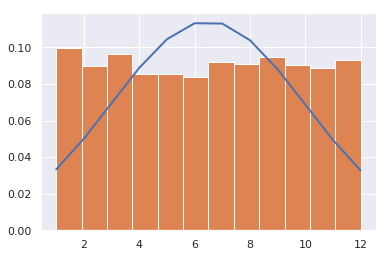

In [17]:
# http://www.pythonforfinance.net/2016/04/04/python-skew-kurtosis/

import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(x)
h = sorted(h)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 

#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2)
plt.hist(h,normed=True,bins = 12)      
plt.show()

This appears to be quite flat, but its a little difficult ot tell if there is any skewness. Lets run a the `skew()` and `kurt()` function to obtain numerical results:

In [21]:
print('Skew =', stats.skew(x))
print('Kurtosis =', stats.kurtosis(x))

Skew = -0.03158644438460896
Kurtosis = -1.2187918406102412


TODO: Interpretations of results... 

## Permutation Test

Difference in Mean

In [20]:
diff_mean = q1_bday.mean() - rest_bday.mean()
diff_mean

-6.052595070364846

The difference in mean fo

In [44]:
# number of permutations required for the permutaiton test
nperm = 1000

# create list ot hold average mean values during permutation test
perm_result = []

for i in range(0,nperm):
    q1_sample = np.random.choice(bday.month, size=100 , replace=False)     # randomly assign Q1 birthdays to sample group
    rest_sample = np.random.choice(bday.month, size=100 , replace=False)   # randomly assign Q2-Q4 birthdayssample group
    sample_diff = q1_sample.mean() - rest_sample.mean()                    # compute difference in sample menas
    perm_result.append(sample_diff)
    
print("Number of values greater than the observed mean difference: ", len([i for i in perm_result if i > diff_mean]))

Number of values greater than the observed mean difference:  1000


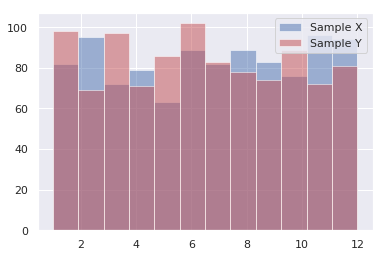

In [14]:
plt.hist(x, bins=12, alpha=0.5, color='b')
plt.hist(y, bins=12,alpha=0.5, color='r')
leg = ['Sample X', 'Sample Y']
plt.legend(leg)
plt.show()

Other Studies - https://www.sciencenewsforstudents.org/article/why-many-olympic-athletes-have-early-birthdays